<a href="https://colab.research.google.com/github/Alexxxa016/AI/blob/main/GeneticMazeAleksandraBuchholz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Genetic Algorithm Assignment

## The Problem




* Description of the problem:

---
I would like to find the shortest path through a maze from a given starting point to a goal. The maze is represented as a 2D grid where 0s indicate open paths and 1s indicate walls. The objective is to navigate from the start to the goal while avoiding walls and finding the shortest path possible.

There can be multiple paths to the goal. I'm going to start with one path first and then expand, but the challenge lies in identifying the most optimal one. The problem becomes more complex by introducing constraints such as limited moves and avoiding backtracking.

---

*   Discussion of the suitablity of Genetic Algorithms

---
Genetic algorithms are particularly well-suited for solving complex optimization problems like finding the shortest path through a maze. They efficiently explore a large search space by evolving a population of potential solutions over several generations. This approach allows the algorithm to search through many possible paths to find the best one, which is crucial for a problem with numerous possible paths like maze-solving.

Genetic algorithms are very flexible and can be adjusted for different maze challenges, like moving through dynamic mazes or following rules like limited moves and avoiding backtracking. They use methods like selection, crossover, and mutation to explore many possible paths and avoid getting stuck in bad ones.

These algorithms can search multiple paths at the same time, which increases the chances of quickly finding the best route. The fitness function helps by checking how close a path is to the goal, punishing wrong moves, and rewarding shorter paths. This process guides the algorithm to find better solutions.

---



# The problem and the cost function





## Initial Problem and cost I started with and its evolution

In [ ]:
###############################################################################
                     # THE ORIGINAL, VERSION 1 #
###############################################################################
import random
import numpy as np
from collections import deque
from copy import deepcopy

#Defining the maze as a 2D grid (0s are open paths and 1s are walls)
maze = [
    [0, 1, 0, 1, 0, 0, 0, 1, 0, 0],
    [0, 1, 0, 1, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 1, 0, 1, 0, 1, 1, 0],
    [0, 1, 1, 1, 0, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 1, 1, 1, 0, 1, 1],
    [0, 1, 1, 0, 0, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 0, 1, 1, 0],
    [0, 0, 0, 1, 1, 0, 1, 0, 1, 0],
    [1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 1, 1, 1, 0]
]

#Defining the start and goal positions
start = (0, 0)
goal = (9, 9)

#Defining the possible moves(0 - Up, 1 - Down, 2 - Left, 3 - Right)
moves = [0,1,2,3]

#The Cost:
#For evaluating the quality of the solution
def cost(solution):
  position = start
  visited = set()
  total_moves = 0
  smoothness_penalty = 0

  #Iterating through the moves in the solution
  for move in solution:
    if move == 0:   # Up
      new_position = (position[0] - 1, position[1])
    elif move == 1: # Down
      new_position = (position[0] + 1, position[1])
    elif move == 2: # Left
      new_position = (position[0], position[1] - 1)
    elif move == 3: # Right
      new_position = (position[0], position[1] + 1)

      #checks to stay within boundary and not in a wall
      if (new_position[0] < 0 or new_position[0] >= len(maze) or
          new_position[1] < 0 or new_position[1] >= len(maze[0]) or
          maze[new_position[0]][new_position[1]] == 1):
          return float('inf')

      #Penalty for backtracking
      if new_position in visited:
        smoothness_penalty += 1
      visited.add(new_position)
      position = new_position
      total_moves += 1
      #Reward for reaching the goal with no backtracking and minimal moves
      if position == goal:
        return total_moves + smoothness_penalty

  # Calculating the Manhattan distance to the goal and penalising backtracking
  # penalising backtracking and longer paths
  manhattan_distance = abs(goal[0] - position[0]) + abs(goal[1] - position[1])
  return manhattan_distance + total_moves + smoothness_penalty

#The Problem:
class Problem:
    def __init__(self):
        self.moves = moves  # Possible moves: Up, Down, Left, Right
        self.number_of_genes = 40  # Length of the chromosome
        self.cost_function = cost  # Cost function for evaluating solutions
        self.acceptable_cost = 0.00001  # Acceptable cost threshold





Improved Error Handling for Invalid Moves
Added Penalty for Hitting a Wall or Boundary

In [ ]:
###############################################################################
                             #  VERSION 2 #
###############################################################################
#CHANGE 1: Improved Error Handling for Invalid Moves
for move in solution:
    if move == 0:  # Up
        new_position = (position[0] - 1, position[1])
    elif move == 1:  # Down
        new_position = (position[0] + 1, position[1])
    elif move == 2:  # Left
        new_position = (position[0], position[1] - 1)
    elif move == 3:  # Right
        new_position = (position[0], position[1] + 1)
    else:
        continue

    # Check for boundaries and walls
    if (0 <= new_position[0] < len(maze) and 0 <= new_position[1] < len(maze[0]) and
            maze[new_position[0]][new_position[1]] == 0):
        position = new_position
        total_moves += 1

        # Penalize backtracking
        if new_position in visited:
            smoothness_penalty += 1
        visited.add(new_position)

        # Check if the goal is reached
        if position == goal:
            return total_moves + smoothness_penalty
    else:
        # Penalize hitting a wall or boundary
        smoothness_penalty += 10

#CHANGE 2:Added Penalty for Hitting a Wall or Boundary

else:
    # Penalize hitting a wall or boundary
    smoothness_penalty += 10

SyntaxError: 'return' outside function (<ipython-input-2-d93576661568>, line 30)

 In the cost function, added the tracking of last_position to avoid backtracking
Inside the loop for each move, modified the backtracking penalty condition
added Larger penalty for backtracking

In [ ]:
###############################################################################
                             #  VERSION 3 #
###############################################################################
#CHANGE 1: Added Tracking of Last Position for Improved Backtracking Penalty

# In the cost function, added the tracking of last_position
# Track the last position to avoid backtracking
last_position = None

# Inside the loop for each move, modified the backtracking penalty condition
if new_position == last_position:
    smoothness_penalty += 5  # Larger penalty for backtracking
visited.add(new_position)
last_position = position


Addition of the finalize_chromosome Function

This function simulates the moves in the chromosome until the goal
is reached, ensuring that all moves are valid and effective. It helps in
refining the solution by filtering out invalid moves and stopping once
the goal is achieved.

In [ ]:
###############################################################################
                             #  VERSION 4 #
###############################################################################
#CHANGE 1: Addition of the finalize_chromosome Function
"""This function simulates the moves in the chromosome until the goal
is reached, ensuring that all moves are valid and effective. It helps in
refining the solution by filtering out invalid moves and stopping once
the goal is achieved."""

# Finalize the chromosome: simulate moves until goal is reached.
def finalize_chromosome(chromosome):
    position = start
    effective_moves = []
    for gene in chromosome:
        if position == goal:
            break
        if gene not in moves:
            continue
        if gene == 0:
            new_position = (position[0] - 1, position[1])
        elif gene == 1:
            new_position = (position[0] + 1, position[1])
        elif gene == 2:
            new_position = (position[0], position[1] - 1)
        elif gene == 3:
            new_position = (position[0], position[1] + 1)
        if (0 <= new_position[0] < len(maze) and
            0 <= new_position[1] < len(maze[0]) and
            maze[new_position[0]][new_position[1]] == 0):
            effective_moves.append(gene)
            position = new_position
        else:
            effective_moves.append(gene)
    return effective_moves


ensuring the cost inst negative

In [ ]:
###############################################################################
                             #  VERSION 5 #
###############################################################################
#CHANGE 1:Ensure Cost is Never Below 0
# Modified the return statements in the cost function to ensure the cost is never below 0
net_cost = total_moves + wall_penalty + inefficiency_penalty + backtracking_penalty - progress_reward
return max(0, net_cost)

remaining_distance = abs(goal[0] - position[0]) + abs(goal[1] - position[1])
net_cost = total_moves + wall_penalty + inefficiency_penalty + backtracking_penalty + remaining_distance - progress_reward
return max(0, net_cost)


Added BFD for shortest path length search but removed it after in my final solution

In [ ]:
###############################################################################
                 #  VERSION 6 #  BFS Removed in final solution
###############################################################################
#CHANGE 1: Added BFS of Shortest Path Length//
"""
This addition precomputes the shortest path length from the start to
the goal using BFS (Breadth-First Search) and stores it in the variable
min_length. This precomputation helps in evaluating the quality of solutions
more effectively.
"""
def bfs_shortest_path_length(maze, start, goal):
    """Return the shortest path length from start to goal using BFS.
       If no path exists, returns None."""
    queue = deque([(start, 0)])
    visited = set([start])
    while queue:
        pos, dist = queue.popleft()
        if pos == goal:
            return dist
        for m in moves:
            dr, dc = move_offsets[m]
            newpos = (pos[0] + dr, pos[1] + dc)
            if (0 <= newpos[0] < len(maze) and 0 <= newpos[1] < len(maze[0])
                and maze[newpos[0]][newpos[1]] == 0):
                if newpos not in visited:
                    visited.add(newpos)
                    queue.append((newpos, dist + 1))
    return None

min_length = bfs_shortest_path_length(maze, start, goal)
if min_length is None:
    raise ValueError("No path exists from start to goal in the maze.")
print(f"Shortest path length (via BFS) = {min_length}")

#Change 2:Updated Cost Function to Use BFS Shortest Path Length
"""
Returns the cost as the absolute difference between the effective path length
(number of moves to reach the goal) and the BFS minimal length.
If the solution does not reach the goal, return a very large cost.
"""
def cost_function(solution):
    effective_moves = finalize_chromosome(solution)
    # Simulate the effective moves
    pos = start
    for move in effective_moves:
        dr, dc = move_offsets[move]
        pos = (pos[0] + dr, pos[1] + dc)
    if pos != goal:
        return 999999  # did not reach goal
    L = len(effective_moves)
    return abs(L - min_length)


##Final Problem and Cost:

In [ ]:
import random
import numpy as np
from copy import deepcopy

##############################################################################
# 1. Maze Definition
##############################################################################

maze = [
    [0, 1, 0, 1, 0, 0, 0, 1, 0, 0],
    [0, 1, 0, 1, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 1, 0, 1, 0, 1, 1, 0],
    [0, 1, 1, 1, 0, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 1, 1, 1, 0, 1, 1],
    [0, 1, 1, 0, 0, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 0, 1, 1, 0],
    [0, 0, 0, 1, 1, 0, 1, 0, 1, 0],
    [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 1, 1, 1, 0]
]

start = (0, 0)
goal  = (9, 9)
moves = [0, 1, 2, 3]  # 0: Up, 1: Down, 2: Left, 3: Right
move_offsets = {
    0: (-1, 0),
    1: ( 1, 0),
    2: ( 0, -1),
    3: ( 0, 1)
}

##############################################################################
# 2. Cost Function and Finalization (No BFS)
##############################################################################

def finalize_chromosome(chromosome):
    """
    Simulate moves from start until goal is reached.
    Return only the valid moves executed.
    """
    position = start
    effective_moves = []
    for gene in chromosome:
        if position == goal:
            break
        if gene not in moves:
            continue
        dr, dc = move_offsets[gene]
        newpos = (position[0] + dr, position[1] + dc)
        if (0 <= newpos[0] < len(maze) and 0 <= newpos[1] < len(maze[0]) and
            maze[newpos[0]][newpos[1]] == 0):
            effective_moves.append(gene)
            position = newpos
    return effective_moves

def cost_function(solution):
    """
    Compute cost as the sum of:
      - Total moves executed.
      - A high penalty for backtracking .
      - A penalty for moves that do not bring progress.
    If the goal is not reached, a large penalty plus Manhattan distance is returned.
    A perfect solution should yield a cost of 0.
    """
    path = finalize_chromosome(solution)
    position = start
    visited = set([start])
    total_moves = 0
    backtracking_penalty = 0
    progress_penalty = 0
    current_distance = abs(goal[0] - start[0]) + abs(goal[1] - start[1])

    for gene in path:
        dr, dc = move_offsets[gene]
        newpos = (position[0] + dr, position[1] + dc)
        total_moves += 1

        new_distance = abs(goal[0] - newpos[0]) + abs(goal[1] - newpos[1])
        if new_distance >= current_distance:
            progress_penalty += 10
        current_distance = new_distance

        if newpos in visited:
            backtracking_penalty += 50
        visited.add(newpos)
        position = newpos

    if position != goal:
        remaining = abs(goal[0] - position[0]) + abs(goal[1] - position[1])
        return total_moves + backtracking_penalty + progress_penalty + remaining + 5000

    return total_moves + backtracking_penalty + progress_penalty

##############################################################################
# 3. problem
##############################################################################

class Problem:
    def __init__(self):
        self.moves = moves
        # Using 40 genes to constrain the search space for a clean solution.
        self.number_of_genes = 40
        self.cost_function = cost_function
        self.acceptable_cost = 0.0




# The Individual


*   Chromosone
*   Crossover
*   Mutation



* Discussion and justification on the approaches taken for the above:

---
### The Individual
An individual is a potential solution to the problem. For the maze, an individual is a complete path from the start to the goal. Each individual is evaluated to see how good it is at solving the maze.

### Chromosome
A chromosome is like a blueprint for an individual. In my case, it's a sequence of moves (0: Up, 1: Down, 2: Left, 3: Right) that shows how to navigate the maze. Each part of the chromosome (gene) represents a move. For example, a chromosome might look like this: [1, 1, 3, 3, 0, 2, ...], showing a path through the maze.

### Crossover
Crossover is a way to combine information from two parent solutions to create new solutions (offspring). It's like mixing two recipes to create new dishes. In the maze problem, parts of two parent paths are taken and combined to create new paths. One simple way is single-point crossover, where a random point is picked in the parents' chromosomes and swapped the segments before and after this point.

### Mutation
Mutation introduces small random changes in a solution. This helps keep diversity in the population and prevents the algorithm from getting stuck in bad solutions. In the maze problem, a mutation might change a move in the chromosome to a different move.

### Justification

Choosing a sequence of moves as the chromosome is simple and fits well with the maze problem, making it easy to understand and work with. The crossover operator combines good parts of parent solutions to create better offspring, helping the algorithm explore new paths by mixing segments of parent chromosomes. Single-point crossover is easy to implement and ensures offspring inherit traits from both parents. Mutation adds randomness and maintains diversity in the population, avoiding getting stuck in bad solutions by occasionally changing genes in the chromosome. This encourages the algorithm to explore different paths and find better solutions.

---






## Initial Individual i started with and its evolution

In [ ]:
###############################################################################
                     # THE ORIGINAL, VERSION 1 #
###############################################################################
# Code for individual class

class Individual:
  #Constructor for initialising an individual with a random chromosome
  def __init__(self,prob):
    self.chromosome = np.random.choice(prob.moves, prob.number_of_genes)
    self.cost = prob.cost_function(self.chromosome)

  #Mutating the chromosome of the individual
  def mutate(self, rate_of_gene_mutation, range_of_gene_mutation):
    for i in range(len(self.chromosome)):
      if np.random.rand() < rate_of_gene_mutation:
        self.chromosome[i] = np.random.choice(range_of_gene_mutation)

  #Crossover between two parents to create two children
  def crossover(self, parent2, prob):
    crossover_point = np.random.randint(1, len(self.chromosome))
    child1_chromosome = np.concatenate((self.chromosome[:crossover_point], parent2.chromosome[crossover_point:]))
    child2_chromosome = np.concatenate((parent2.chromosome[:crossover_point], self.chromosome[crossover_point:]))

    child1 = deepcopy(self)
    child2 = deepcopy(parent2)

    child1.chromosome = child1_chromosome #Updates the first childs chromosome with the newly created chromosome
    child2.chromosome = child2_chromosome

    child1.cost = prob.cost_function(child1.chromosome) #Recalculates the cost for child1 based on its new chromosome
    child2.cost = prob.cost_function(child2.chromosome)

    return child1, child2

#random selection of two parents from population
def choose_parents(number_in_population):
  return np.random.choice(number_in_population, 2, replace=False)


Updates made from original in the comments below

In [ ]:
###############################################################################
                            # VERSION 2 #
###############################################################################
# CHANGE 1: Two-Point Crossover
"""
The crossover method was updated from single-point crossover to two-point
crossover to introduce more genetic diversity.
"""
def crossover(self, parent2, prob):
        # Two-point crossover
        point1 = np.random.randint(1, len(self.chromosome) - 1)
        point2 = np.random.randint(point1, len(self.chromosome))
        child1_chrom = deepcopy(self.chromosome)
        child2_chrom = deepcopy(parent2.chromosome)
        child1_chrom[point1:point2], child2_chrom[point1:point2] = parent2.chromosome[point1:point2], self.chromosome[point1:point2]

#CHANGE 2: Tournament Selection Function
"""
A new function tournament_selection was added to select parents using a
tournament selection approach, enhancing the selection process."""
def tournament_selection(population, tournament_size=3):
    competitors = random.sample(population, tournament_size)
    return min(competitors, key=lambda ind: ind.cost)

#CHANGE 3: Local Search Function
"""A new function local_search was added to apply a simple local search
to an individual, making small gene tweaks to improve solutions.
"""
def local_search(individual, prob, iterations=5):
    best = deepcopy(individual)
    for _ in range(iterations):
        candidate = deepcopy(best)
        index = np.random.randint(0, len(candidate.chromosome))
        candidate.chromosome[index] = np.random.choice(prob.moves)
        candidate.cost = prob.cost_function(candidate.chromosome)
        if candidate.cost < best.cost:
            best = candidate
    return best


##Final Individual

In [ ]:
###############################################################################
  # 4. Individual
###############################################################################
class Individual:
    def __init__(self, prob):
        self.chromosome = np.random.choice(prob.moves, prob.number_of_genes)
        self.cost = prob.cost_function(self.chromosome)

    def mutate(self, rate_of_gene_mutation, mutation_range):
        for i in range(len(self.chromosome)):
            if np.random.rand() < rate_of_gene_mutation:
                self.chromosome[i] = np.random.choice(mutation_range)
        self.cost = prob.cost_function(self.chromosome)

    def crossover(self, parent2, prob):
        point1 = np.random.randint(1, len(self.chromosome) - 1)
        point2 = np.random.randint(point1, len(self.chromosome))
        child1_chrom = deepcopy(self.chromosome)
        child2_chrom = deepcopy(parent2.chromosome)
        child1_chrom[point1:point2], child2_chrom[point1:point2] = (
            parent2.chromosome[point1:point2],
            self.chromosome[point1:point2]
        )
        child1 = deepcopy(self)
        child2 = deepcopy(parent2)
        child1.chromosome = child1_chrom
        child2.chromosome = child2_chrom
        child1.cost = prob.cost_function(child1.chromosome)
        child2.cost = prob.cost_function(child2.chromosome)
        return child1, child2

def tournament_selection(population, tournament_size=3):
    competitors = random.sample(population, tournament_size)
    return min(competitors, key=lambda ind: ind.cost)

def local_search(individual, prob, iterations=20):
    best = deepcopy(individual)
    for _ in range(iterations):
        candidate = deepcopy(best)
        index = np.random.randint(0, len(candidate.chromosome))
        candidate.chromosome[index] = np.random.choice(prob.moves)
        candidate.cost = prob.cost_function(candidate.chromosome)
        if candidate.cost < best.cost:
            best = candidate
    return best

# Running the algorithm  

*   Parameter choices
*   Modifications (if any) to run_genetic
*   Rationale for the above


###Parameters

In [ ]:
###############################################################################
  # 5. Parameters
###############################################################################
"""
The parameters have been tweaked and changed continuously throughout the
evolution of this genetic mazesolver. Main changes revolved around population size, number of generations and mutation rate
"""
class Parameters:
    def __init__(self):
        self.population_size = 500
        self.birth_rate_per_generation = 1
        self.gene_mutation_rate = 0.15
        self.gene_mutation_range = moves
        self.max_number_of_generations = 1000
        self.acceptable_cost = 0.0

prob = Problem()
params = Parameters()

###Initial run_genetic and its evolution

CHANGES MADE ARE SPECIFIED IN THE LONG COMMENTS

In [ ]:
###############################################################################
                     # THE ORIGINAL, VERSION 1 #
###############################################################################

# Run Genetic method
def run_genetic(prob, params):
  #Read variables
  number_in_population = params.population_size
  birth_rate_per_generation = params.birth_rate_per_generation
  rate_of_gene_mutation = params.gene_mutation_rate
  range_of_gene_mutation = params.gene_mutation_range
  max_number_of_generations = params.max_number_of_generations
  cost_function = prob.cost_function
  acceptable_cost = prob.acceptable_cost
  number_of_children_per_generation = number_in_population * params.birth_rate_per_generation

  #Create Initial population
  population = []
  best_solution = Individual(prob)
  best_solution.cost = np.inf

  #Initialize the population
  for i in range(number_in_population):
    new_individual = Individual(prob)
    if new_individual.cost < best_solution.cost:
      best_solution = deepcopy(new_individual)
    population.append(new_individual)

  # Main loop for running the genetic algorithm
  for i in range(max_number_of_generations):
    children = []
    while len(children) < number_of_children_per_generation:
      parent1_index, parent2_index = choose_parents(number_in_population)

      parent1 = population[parent1_index]
      parent2 = population[parent2_index]

      #Create children
      child1, child2 = parent1.crossover(parent2, prob)
      child1.mutate(rate_of_gene_mutation, range_of_gene_mutation)
      child2.mutate(rate_of_gene_mutation, range_of_gene_mutation)
      child1.cost = cost_function(child1.chromosome)
      child2.cost = cost_function(child2.chromosome)
      children.append(child1)
      children.append(child2)

      population += children

      #Sort population
      population = sorted(population, key=lambda x: x.cost)

      #Cull population
      population = population[:number_in_population]

      #Check solution
      if population[0].cost < best_solution.cost:
        best_solution = deepcopy(population[0])
      if best_solution.cost <= acceptable_cost:
        break

  return population, best_solution

In [ ]:
###############################################################################
                            # VERSION 2 #
###############################################################################
# CHANGE 1:
"""
Elitism is introduced to retain the best individual from the previous generation.
The elite individual is appended back to the population after sorting and
culling to ensure the best solution is not lost.
"""
# Elitism: Retain the best individual from the previous generation
        elite_individual = deepcopy(population[0])
        population += children
        population = sorted(population, key=lambda x: x.cost)[:number_in_population-1]
        population.append(elite_individual)


In [ ]:
###############################################################################
                            # VERSION 3 #
###############################################################################
# CHANGE 1:Population Initialization
best_solution = None
for _ in range(params.population_size):
        ind = Individual(prob)
        population.append(ind)
        if best_solution is None or ind.cost < best_solution.cost:
            best_solution = deepcopy(ind)

# CHANGE 2:Iteration Variables
generation = 0
    while generation < params.max_number_of_generations:

#CHANGE 3:Tournament Selection for Parents and local search
            parent1 = tournament_selection(population)
            parent2 = tournament_selection(population)

            child1 = local_search(child1, prob)
            child2 = local_search(child2, prob)

In [ ]:
###############################################################################
                            # VERSION 4 #
###############################################################################
# CHANGE 1:Adjusted Cost Calculation
"""
the printed value is adjusted by subtracting
the Manhattan distance between the start and goal
because i dont want the manhattan distance to represent the final cost
"""
 if generation % 100 == 0:
            baseline = abs(goal[0] - start[0]) + abs(goal[1] - start[1])
            adjusted_cost = best_solution.cost - baseline
            print(f"Generation {generation}: Best adjusted cost = {adjusted_cost}")
 if best_solution.cost <= params.acceptable_cost:
            print(f"Perfect path found in generation {generation}!")
            break



###Final run_genetic

In [ ]:
##############################################################################
                    # 6. Run the Genetic Algorithm
##############################################################################

def run_genetic(prob, params):
    population = []
    best_solution = None

    # Initialize population
    for _ in range(params.population_size):
        ind = Individual(prob)
        population.append(ind)
        if best_solution is None or ind.cost < best_solution.cost:
            best_solution = deepcopy(ind)

    generation = 0
    while generation < params.max_number_of_generations:
        new_children = []
        while len(new_children) < params.population_size * params.birth_rate_per_generation:
            parent1 = tournament_selection(population)
            parent2 = tournament_selection(population)
            child1, child2 = parent1.crossover(parent2, prob)
            child1.mutate(params.gene_mutation_rate, params.gene_mutation_range)
            child2.mutate(params.gene_mutation_rate, params.gene_mutation_range)
            child1 = local_search(child1, prob)
            child2 = local_search(child2, prob)
            new_children.extend([child1, child2])

        population.extend(new_children)
        population = sorted(population, key=lambda ind: ind.cost)[:params.population_size]
        best_solution = population[0]
        generation += 1

        if generation % 100 == 0:
            baseline = abs(goal[0] - start[0]) + abs(goal[1] - start[1])
            adjusted_cost = best_solution.cost - baseline
            print(f"Generation {generation}: Best adjusted cost = {adjusted_cost}")
        if best_solution.cost <= params.acceptable_cost:
            print(f"Perfect path found in generation {generation}!")
            break

    return population, best_solution


In [ ]:
##############################################################################
          # 7. Run the Genetic Algorithm and Print Results
##############################################################################

prob = Problem()
params = Parameters()
population, best_solution = run_genetic(prob, params)
final_moves = finalize_chromosome(best_solution.chromosome)
num_moves = len(final_moves)

baseline = abs(goal[0] - start[0]) + abs(goal[1] - start[1])
adjusted_cost = best_solution.cost - baseline

print("\nFinal Results:")
print("Best solution cost (adjusted) =", adjusted_cost)
print("Number of moves in solution =", num_moves)
print("Effective move sequence =", final_moves)


Generation 100: Best adjusted cost = 5000
Generation 200: Best adjusted cost = 5000
Generation 300: Best adjusted cost = 5000
Generation 400: Best adjusted cost = 5000
Generation 500: Best adjusted cost = 5000
Generation 600: Best adjusted cost = 0
Generation 700: Best adjusted cost = 0
Generation 800: Best adjusted cost = 0
Generation 900: Best adjusted cost = 0
Generation 1000: Best adjusted cost = 0

Final Results:
Best solution cost (adjusted) = 0
Number of moves in solution = 18
Effective move sequence = [np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(3), np.int64(3), np.int64(3), np.int64(1), np.int64(3), np.int64(3), np.int64(1), np.int64(1), np.int64(1), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(1)]


### Progression of outputs


---

The reason each output was imporoving was mainly due to tweaking parameters such as ...


population_size,gene_mutation_rate and max_number_of_generations until the best cost was achieved.


VERSION 1
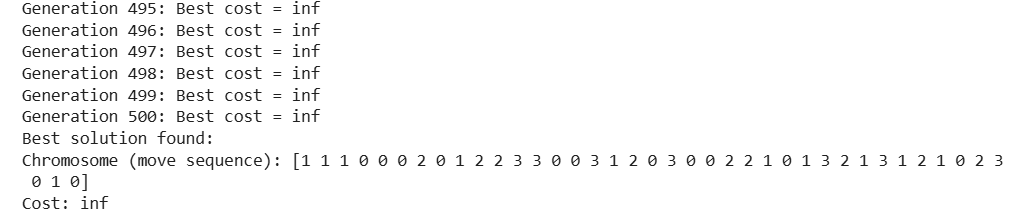
VERSION 2
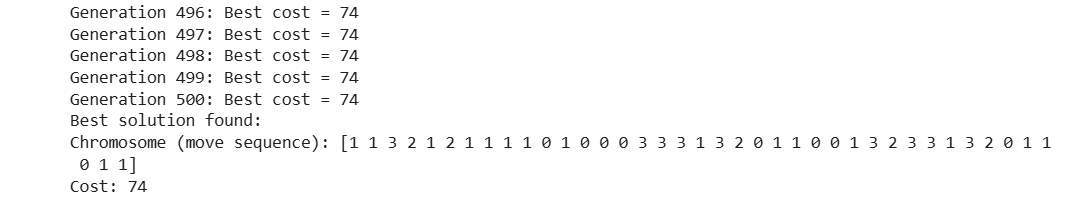
VERSION 3
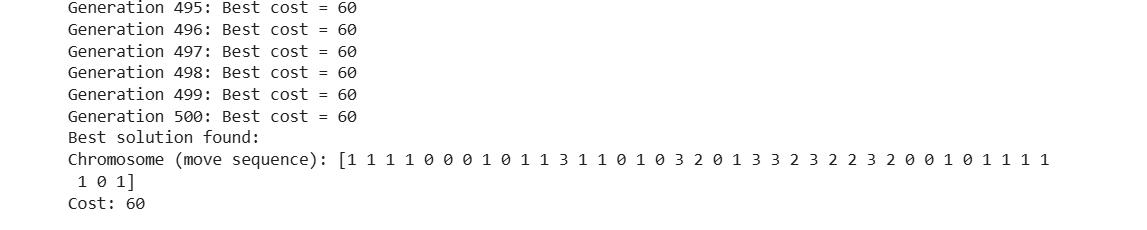
VERSION 4
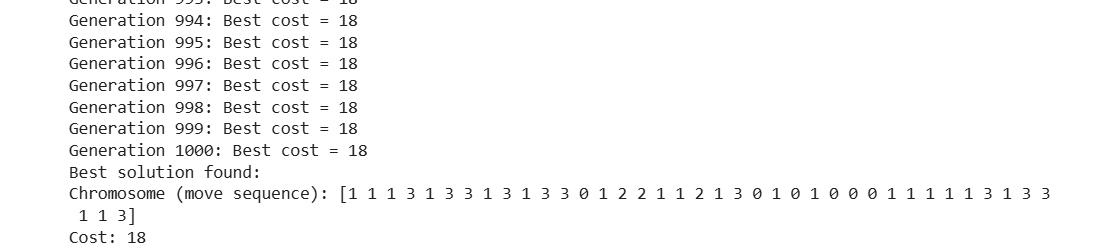
VERSION 5
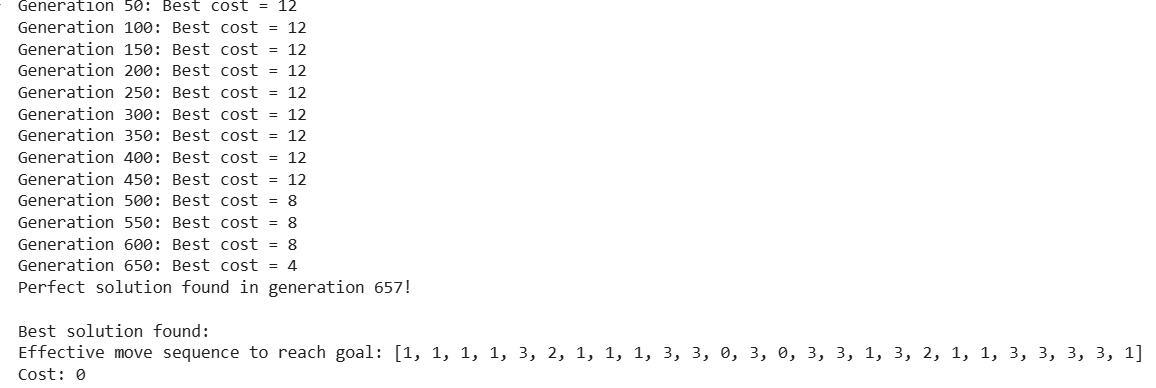

VERSION 5 VISUALISED PATH
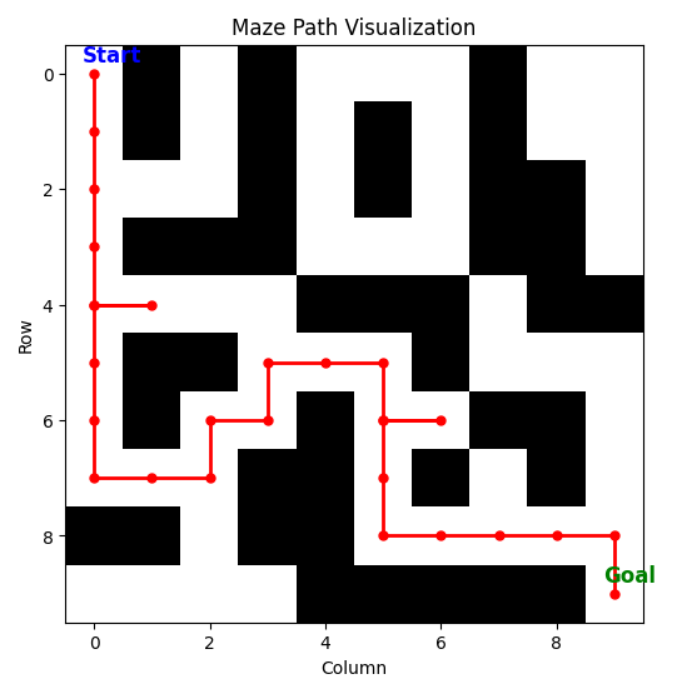
VERSION 6
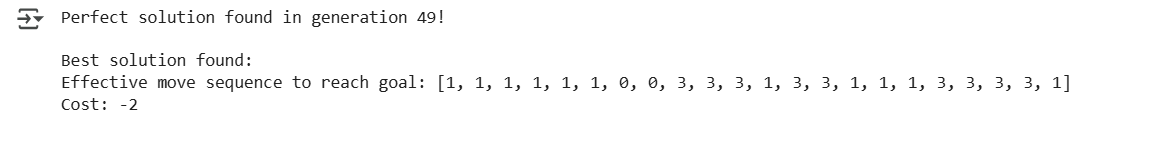
VERSION 7
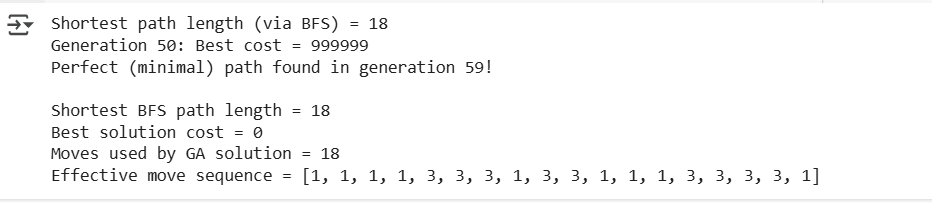

###BEST SOLUTION PATH

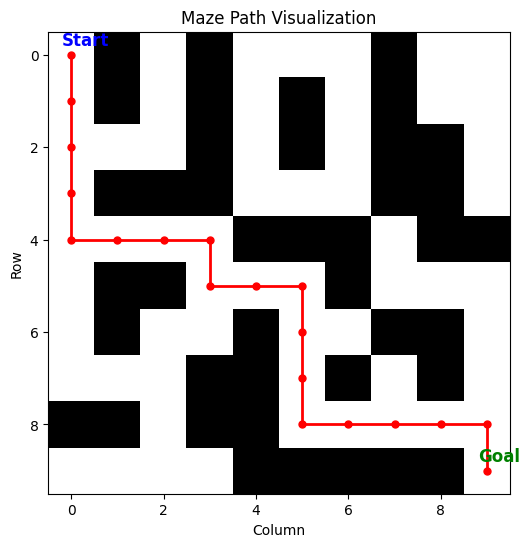

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Maze definition (0 = open path, 1 = wall)
maze = np.array([
    [0, 1, 0, 1, 0, 0, 0, 1, 0, 0],
    [0, 1, 0, 1, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 1, 0, 1, 0, 1, 1, 0],
    [0, 1, 1, 1, 0, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 1, 1, 1, 0, 1, 1],
    [0, 1, 1, 0, 0, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 0, 1, 1, 0],
    [0, 0, 0, 1, 1, 0, 1, 0, 1, 0],
    [1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 1, 1, 1, 0]
])

# start and goal positions
start = (0, 0)
goal = (9, 9)

# final move sequence
# Mapping: 0 = Up, 1 = Down, 2 = Left, 3 = Right
move_sequence = [1, 1, 1, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 3, 3, 3, 3, 1]

# Mapping of moves to coordinate changes:
# 0: Up (-1 row), 1: Down (+1 row), 2: Left (-1 column), 3: Right (+1 column)
move_map = {
    0: (-1, 0),
    1: (1, 0),
    2: (0, -1),
    3: (0, 1)
}

# Simulating the path using the move sequence
path = [start]
current = start
for move in move_sequence:
    dx, dy = move_map[move]
    new_position = (current[0] + dx, current[1] + dy)
    path.append(new_position)
    current = new_position

# plotting the maze and the path
plt.figure(figsize=(6, 6))
# Use origin='upper' (0,0) is at the top left corner.
plt.imshow(maze, cmap='gray_r', origin='upper')

# Converting path positions for plotting (x: column, y: row)
path_x = [p[1] for p in path]
path_y = [p[0] for p in path]

# Plotting the path as a red line with markers
plt.plot(path_x, path_y, marker='o', color='red', linewidth=2, markersize=5)

# Annotating start and goal positions
plt.text(start[1] - 0.2, start[0] - 0.2, "Start", color='blue', fontsize=12, weight='bold')
plt.text(goal[1] - 0.2, goal[0] - 0.2, "Goal", color='green', fontsize=12, weight='bold')

plt.title("Maze Path Visualization")
plt.xlabel("Column")
plt.ylabel("Row")
# No inversion: row 0 stays at the top
plt.grid(False)
plt.show()

# Results and conclusions    

The final implementation of the maze solver genetic algorithm was tested on a 10×10 maze with designated start (0,0) and goal (9,9) positions. The algorithm now uses the Manhattan distance as a baseline to determine the minimal number of moves required, and the cost function was redefined to measure the deviation of an evolved solution’s effective move sequence from this baseline. The final configuration employed a fixed chromosome length, along with a modular structure, tuned GA parameters, and a local search step for refinement.

---

#### Results:

* The Manhattan baseline indicates a minimal path length of 18 moves.
* The genetic algorithm converged to a solution with an effective move sequence exactly 18 moves long.
* The final solution’s cost was 0, indicating that the evolved path matched the optimal move count.
* The effective move sequence obtained was: [1, 1, 1, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 3, 3, 3, 3, 1].

---
####Conclusions:

The final product uses the Manhattan distance as an objective target for the shortest path and a cost function that rewards only solutions matching this minimal move count. By employing a fixed chromosome length, increasing the population size and mutation rate, and adding a local search step, the algorithm explores more possibilities and converges faster. Overall, these changes guide the GA to evolve only the most direct and efficient path through the maze.